### **Training, save with float32**

Do not use operations not supported by k210, https://github.com/kendryte/nncase/blob/v0.2.0-beta4/docs/tflite_ops.md

Found 293 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


C:\Users\23hangin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2059 - loss: 2.1479

C:\Users\23hangin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 396ms/step - accuracy: 0.2101 - loss: 2.1308 - val_accuracy: 0.5000 - val_loss: 1.5348
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.4978 - loss: 1.4842 - val_accuracy: 0.7286 - val_loss: 1.0838
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7428 - loss: 0.9604 - val_accuracy: 0.8143 - val_loss: 0.6942
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8342 - loss: 0.6669 - val_accuracy: 0.8286 - val_loss: 0.6330
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.8347 - loss: 0.5265 - val_accuracy: 0.7571 - val_loss: 0.6997
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8557 - loss: 0.5013 - val_accuracy: 0.8714 - val_loss: 0.5337
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.8691 - loss: 0.4152 - val_accuracy: 0.8571 - val_loss: 0.4866
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8609 - loss: 0.4480 - val_accuracy: 0.8143 - val_

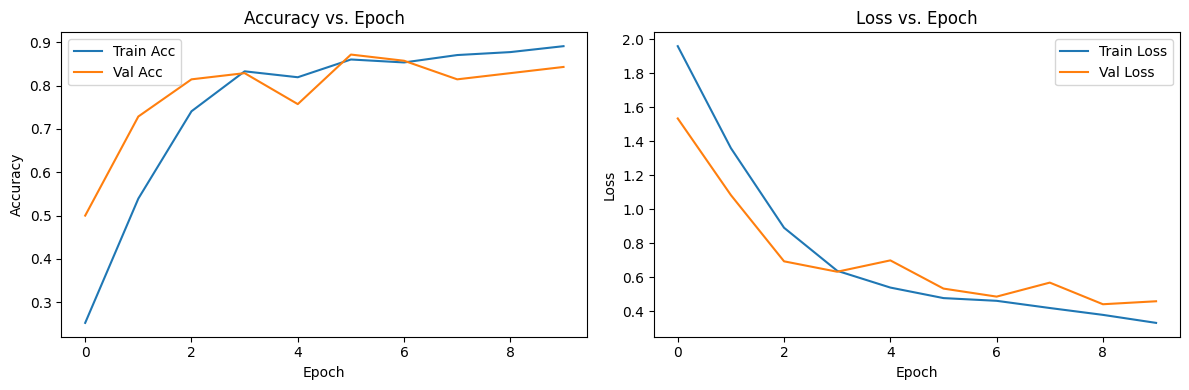

INFO:tensorflow:Assets written to: C:\Users\23hangin\AppData\Local\Temp\tmp3_fvrflk\assets


INFO:tensorflow:Assets written to: C:\Users\23hangin\AppData\Local\Temp\tmp3_fvrflk\assets


Saved artifact at 'C:\Users\23hangin\AppData\Local\Temp\tmp3_fvrflk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2392163163152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163166224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163168144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163167760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163166608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163168336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163167376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163165648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163168528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2392163166416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  23

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Configure constants
INPUT_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 7
EPOCHS = 10

# Load base model with reduced size
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
    alpha=0.35  # Use even smaller model
)

# Add custom head with fewer parameters
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)  # Further reduced from 64
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Data generators with smaller image size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2  # Create validation split from training data
)

train_generator = train_datagen.flow_from_directory(
    './data/preprocessed',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    './data/preprocessed',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # Set as validation data
)

# Compile & fit
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Save Keras model
# model.save('road_classifier_keras.h5')
# print("Keras model saved as road_classifier_keras.h5")

# Create TFLite converter WITHOUT quantization settings
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# No optimizations or quantization parameters
# This will produce a standard float32 model without QUANTIZE/DEQUANTIZE ops

# Convert model to TFLite
tflite_model = converter.convert()

# Save TFLite model
with open('model_float32.tflite', 'wb') as f:
    f.write(tflite_model)
print("Float32 model saved as model_float32.tflite")

print("\nNow convert to kmodel using:")
print("ncc compile model_float32.tflite road_classifier.kmodel -i tflite -o kmodel -t k210 --dataset ./data/preprocessed")


### **Get the correct order of labels for the maix end**

In [3]:
print(train_generator.class_indices)


{'forward': 0, 'intersection': 1, 'left_right_t': 2, 'left_turn': 3, 'right_turn': 4, 'straight_left': 5, 'straight_right': 6}


### **Small test with non-training images**

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = './data/testing/intersection-test.jpg'

#input_size = 224
input_size = 128

# Load and preprocess the image
img = image.load_img(img_path, target_size=(input_size, input_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize to match training preprocessing

# Predict
predictions = model.predict(img_array)

# Get class indices to map predictions back to labels
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Invert mapping

# Get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_label = class_labels[predicted_class_index]

print(f"Predicted road type: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted road type: intersection


### **Validate that the model is ready for conversion**

In [12]:
import flatbuffers
from tflite.Model import Model
import tflite.BuiltinOperator as BuiltinOp

# Build a mapping from code→name
op_names = {
    val: name
    for name, val in BuiltinOp.__dict__.items()
    if isinstance(val, int)
}

# Load your TFLite flatbuffer
with open("model_float32.tflite", "rb") as f:
    buf = f.read()

model = Model.GetRootAsModel(buf, 0)

print("Ops used in this model:")
seen = set()
for i in range(model.OperatorCodesLength()):
    code = model.OperatorCodes(i).BuiltinCode()
    name = op_names.get(code, f"UNKNOWN({code})")
    if name not in seen:
        print(f"  • {name}")
        seen.add(name)



Ops used in this model:
  • CONV_2D
  • DEPTHWISE_CONV_2D
  • ADD
  • MEAN
  • FULLY_CONNECTED
  • SOFTMAX
